The goal of this notebook is to generate colormap to be use with pycortex

In [2]:
from PIL import Image
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go

main_dir = '/Users/uriel/disks/meso_shared'
project_dir = 'RetinoMaps'
cortex_dir = "{}/{}/derivatives/pp_data/cortex/colormaps/".format(main_dir, project_dir)


In [3]:
# colors you want 
# Rois colors 
# sunset_colors = px.colors.sequential.Sunset[:4]
# rainbow_colors = px.colors.sequential.Rainbow[:]
# colors = [tuple(map(int, color.strip('rgb()').split(','))) for color in sunset_colors + rainbow_colors]
# colors.pop()

# Glm colors 
cmap = plt.get_cmap('tab10').reversed()
colors = [cmap(i) for i in range(cmap.N)]
colors = colors[2:]
colors = [(int(color[0] * 255), int(color[1] * 255), int(color[2] * 255)) for color in colors]
colors[0] = (255,255,255)

#  Make the image
image = Image.new("RGB", (len(colors), 1))

#  put the colors on the image
for i in range(len(colors)):
    image.putpixel((i, 0), colors[i])

# # Export the colormap 
# # color_map_name = 'rois_colors'
# color_map_name = 'stats_colors'
# image.save('{}/{}.png'.format(cortex_dir,color_map_name))


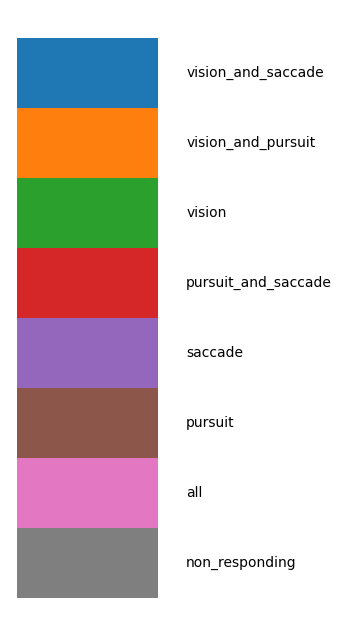

In [16]:
code_name = ['non_responding', 'all', 'pursuit', 'saccade', 'pursuit_and_saccade', 'vision', 'vision_and_pursuit', 'vision_and_saccade']

# Création d'une figure
plt.figure(figsize=(2, 8))

# Affichage des couleurs sans bordures
for i, (color, name) in enumerate(zip(colors_rgb, code_name)):
    plt.fill_between([0, 1], i, i+1, color=color, linewidth=0)
    plt.text(1.2, i+0.5, name, va='center')

# Configuration de l'axe
plt.axis('off')

# Affichage de la figure
plt.savefig('/Users/uriel/Downloads/color_map.pdf')
plt.show()
